In [2]:
# 시계열 다루기
#기본Python 날짜와 시간 : datetime 과 dateutil
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
# dateUtil 모듈을 이용해 다양한 문자열 형태로 부터 날짜를 해석할 수 있다
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [4]:
# Datetime 객체를 갖고 나면 요일을 출력하는 등의 작업을 할 수 있다
date.strftime('%A')

'Saturday'

In [6]:
# NumPy의 datetime64
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [7]:
print(date)

2015-07-04


In [8]:
# 날짜 포맷이 정해지고 나면 거기에 벡터화된 연산을 빠르게 수행할 수 있다
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [9]:
# 하루단위의 datetime
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [10]:
# 분단위의 datetime
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [11]:
# 시간의 단위를 나노초로 정한 것
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [12]:
# pandas에서의 날짜와 시간: 두 세계의 최선
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [13]:
date.strftime('%A')

'Saturday'

In [14]:
# NumPy스타일의 벡터화된 연산을 직접 수행할 수도 있다
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [15]:
# Pandas 시계열: 시간을 인덱싱하기
# 시간 인덱스르 가진 데이터의 Series객체를 구성할 수 있다
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [16]:
# 데이터를 Series에 저장했으니 이제 날짜로 변환될 수 있는 값을 전달해 모든 Series인덱싱 패턴에 사용할 수 있다
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [17]:
# 특별한 날짜 전용 인덱싱 연산이 있다
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [19]:
# 단일 날짜를 pd.to_datetime()에 전달하면 Timestamp를 생성하고, 일련의 날짜를 전달하면 DatetimeIndex를 생성하는 것이 기본이다
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                        '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [20]:
# DatetimeIndex는 to_period()함수에 주기(frequency)코드를 추가해 PeriodIndex로 전달할 수 있다. 
# 여기서는 일별 주기를 가르키는 ‘D’를 사용할 것 이다
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [21]:
# 어떤 날짜에서 다른 날짜를 빼면 TimedeltaIndex가 생성된다
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [23]:
# pd.date_range()는 시작일, 종료일, 선택적 주기 코드를 받아서 정규 날짜 시퀀스를생성한다. 
# 기본적으로 주기는 하루로 설정돼 있다
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [24]:
# 시작점과 기간의 수로 지정할 수도 있다
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [25]:
# freg인수를 바꿔서 간격을 조정할 수 있는데, 기본값은 0로 설정돼 있다. 
# 시간 단위의 타임스탬프 범위를 만들어 보자
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [26]:
# 월 단위 기간
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [27]:
# 시간 단위로 증가하는 기간의 시퀀스를 생성
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [28]:
# 2시간 30분 간격의 주기를 지정하려면 시간(H)과 분(T)코드를 다음과 같이 결합하면 된다
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [30]:
# 영업일 오프셋을 바로 만들 수 있다
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [6]:
# 리샘플링, 시프팅, 윈도잉
# pandas-datareader패키지
# yahoo의 종가 이력 적재
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [ ]:
# 문제를 간단하게 만들기 위해 종가만 사용한다.
goog = goog['Close']

In [8]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<AxesSubplot:xlabel='Date'>

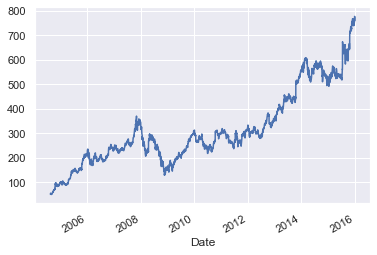

In [9]:
goog.plot()

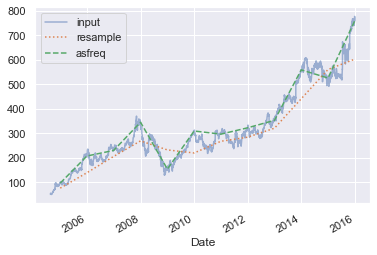

In [10]:
# 리샘플링 및 주기 변경
# 시계열 데이터에서 일반적으로 필요한 작업은 더 높거나 낮은 주기로 표본을 다시 추출(resampling)하는 것
# resample()메서드를 사용하거나 훨씬 더 간단한 asfreg()메서드를 사용해 수행할 수 있다
# resample()은 기본적으로 데이터를 집계하지만 asfreg()는 기본적으로 데이터를 선택
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],  loc='upper left');
#resample은 전년도 평균을 보여주지만, asfreg는 연말 주기를 보여준다는 것이다

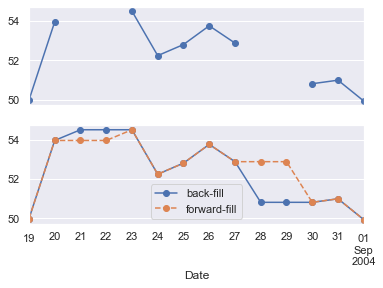

In [11]:
# 영업일 데이터를 일별 주기로(주말 포함) 리샘플링할 것이다
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);
# 영업일이 아닌 날은 NA값으로 두기 때문에 그래프 상에 표시되지 않는다. 
# 아래 그림은 그 틈을 채우기 위한 두 가지 전략인 순방향 채우기와 역방향 채우기의 차이를 보여준다

/opt/anaconda3/envs/python3_7/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  if sys.path[0] == '':


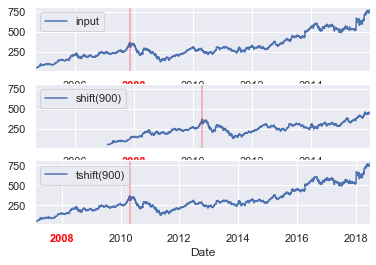

In [15]:
# (시간 이동)Time-shifts
# 시간에 따라 데이터를 이동시키는 것
# shift()는 데이터를 이동시키는 반면 tshift()는 인덱스를 이동시킨다는데 있다
# 900일 단위로 shift()와 tshift()를 수행
import pandas as pd

fig, ax = plt.subplots(3, sharey=True)
# 데이터에 주기를적용
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

#범례와 주석
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

# 여기서 shift(900)은 데이터를 900일 이동시켜서 그래프 끝의 일부를 밀어내고 그 반대쪽은 NA값으로 두는 반면, tshift(900)은 인덱스값을 900일 만큼 이동시킨다

/opt/anaconda3/envs/python3_7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  


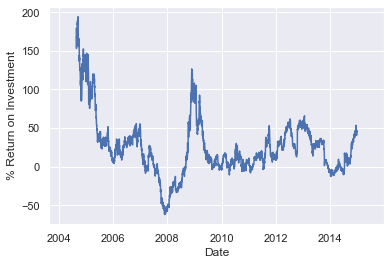

In [16]:
# 예제는 이동된 값을 사용해 데이터세트의 기간 동안 야후 주가의 연간 투자 대비 효과를 계산한 것이다
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');
# 그래프는 구글 주식의 전반적 추세를 보여준다. 지금까지 구글에 투자하기가장 좋았던 시점은 구글의 IPO바로 다음과 2009년 불황기 때였다.

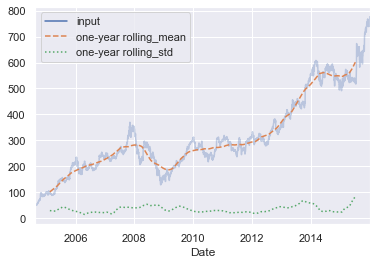

In [17]:
# (롤링 윈도우)Rolling windows
# 야후 주가의 1년 중심 롤링 평균과 표준편차를 구한 것
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [20]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4248k    0 4248k    0     0   127k      0 --:--:--  0:00:33 --:--:--  158k


In [27]:
data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [31]:
# 편의상 이 데이터세트의 열 이름을 단축
data.columns = ['Total', 'East', 'West']

In [32]:
# 데이터의 요약 통계를 살펴보자
data.dropna().describe()

,Total,East,West
count,136313.000000,136313.000000,136313.000000
mean,112.975065,51.514060,61.461005
std,143.607191,66.214446,89.406687
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


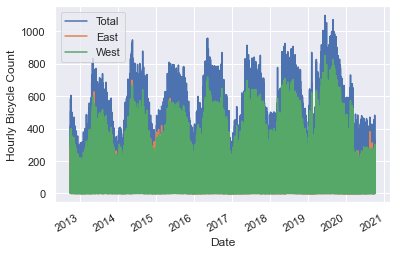

In [34]:
# 데이터 시각화하기
import seaborn; seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count');

Text(0, 0.5, 'Weekly bicycle count')

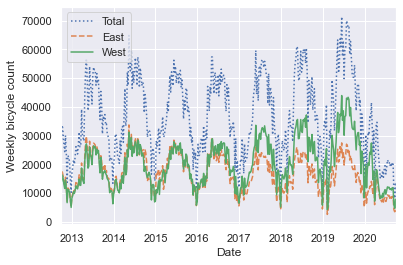

In [35]:
# 주 단위로 샘플링해 보자
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
#예상했듯이 사람들은 겨울보다 여름에 자전거를 더 많이 타며 특정 계절에는 자전거 사용횟수가 주마다 달라진다

Text(0, 0.5, 'mean hourly count')

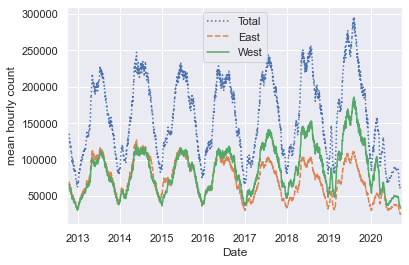

In [36]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
#결과가 들쑥날쑥한 것은 기간을 잘라서 표기했기 때문이다

<AxesSubplot:xlabel='Date'>

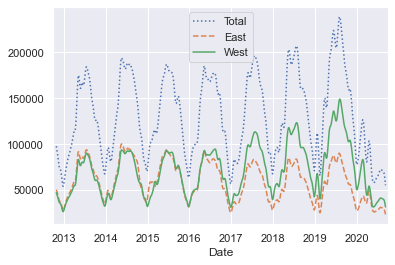

In [39]:
#가우스 윈도우(Gausian window)같은 윈도우 함수를 사용해 롤링 평균을 부드럽게 표현할 수 있다. 
# 다음 코드는 윈도우 폭(50일로 선택)과 윈도우 내 가우스 폭(10일로 선택)을 모두 지정한다
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

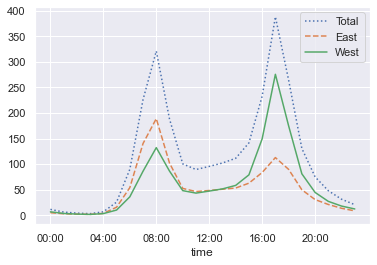

In [40]:
# 데이터 파헤쳐 보기
# 하루의 사간대를 기준으로 한 함수로 평균 통행량을 보고 싶다고 하자. 
# 이 작업은 “집계와 분류”에서 소개한 groupby기능을 사용해 수행할 수 있다
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);
#시간대별 통행량은 아침 8시와 저녁 5시 무렵에 정점을 이루는 강한 양봉 분포를 보인다.
#이는 다리를 건너는 출근 통행량인것으로 보인다.

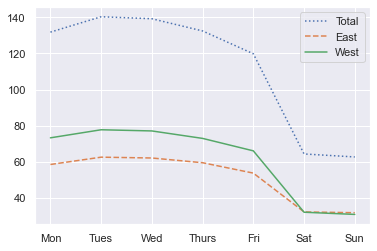

In [41]:
# 요일에 따라 통행량이 어떻게 변하는지 궁금할 수도 있다. 이 문제 역시 간단한 groupby로 답을 구할 수 있다
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);
# 여기서 주중과 주말 총합 사이에 차이가 뚜렷하게 드러난다.  
# 월요일부터 금요일까지 평균 통행량이 토요일과 일용일의 평균 통행량의 두 배 정도다

In [42]:
# 복합적인 groupby를 사용해 주중과 주말의 시간대별 추이를 살펴본다
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

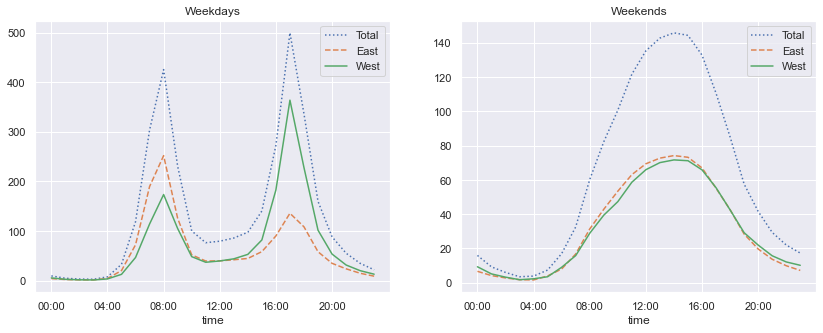

In [45]:
# “다중 서브플롯”에서 설명한 Mathplotlibㅗ구의 일부를 사용해 두 그래프를 나란히 그려보자.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',   
                            xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',   
                            xticks=hourly_ticks, style=[':', '--', '-']);